# Causalidad

In [4]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

- 31 pacients con dolor lumbar asignados al azar.

Tratamiento: 

- 15 pacientes en el grupo de tratamiento
- Se le suministro el medicamento

Control: 

- 16 pacientes en el grupo de control.
- Se le suministro suero fisiológico(salina normal)



Los médicos que suministraban el medicamento: 
- No conocian cual era el grupo de control y tratamiento, es decir, no sabian cual era el medicamento suministrado(salina o el tratamiento para el dolor de espalda)
 

In [5]:
bta = Table.read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [6]:
bta.group("Group")

Group,count
Control,16
Treatment,15


In [7]:
bta.group("Group", np.sum)

Group,Result sum
Control,2
Treatment,9


¿Que conclusiones podemos sacar, leyendo este dataset?

In [8]:
bta.group("Group", np.average)

Group,Result average
Control,0.125
Treatment,0.6


- 60% de los pacientes se recuperaron en el grupo de control
- 12.5% se recuperacron en el grupo de tratamiento

In [9]:
resultados_observados = Table.read_table("resultados_observados.csv")

1. ¿Que resultados hubiera obtenido el grupo de control si se asigna al grupo de tratamiento?, 
el resultado es desconocido

2. ¿Que resultados hubiera obtenido el grupo de tratamiento  si se asigna al grupo de control?, 
el resultado es desconocido

In [10]:
resultados_observados.show()

Unnamed: 0,Group,Result,AsignaTratamiento,AsignaControl
0,Control,1,Desconocido,1.0
1,Control,1,Desconocido,1.0
2,Control,0,Desconocido,0.0
3,Control,0,Desconocido,0.0
4,Control,0,Desconocido,0.0
5,Control,0,Desconocido,0.0
6,Control,0,Desconocido,0.0
7,Control,0,Desconocido,0.0
8,Control,0,Desconocido,0.0
9,Control,0,Desconocido,0.0


In [11]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [12]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [13]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [14]:
distance(bta, 'Group')

0.475

In [15]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [16]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

Group,Result,Shuffled Label
Control,1,Control
Control,1,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Treatment
Control,0,Control
Control,0,Treatment


In [17]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.08750000000000002

In [18]:
distance(bta_with_shuffled_labels, 'Group')

0.475

In [19]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [20]:
distances = make_array()
repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

Observed Distance 0.475


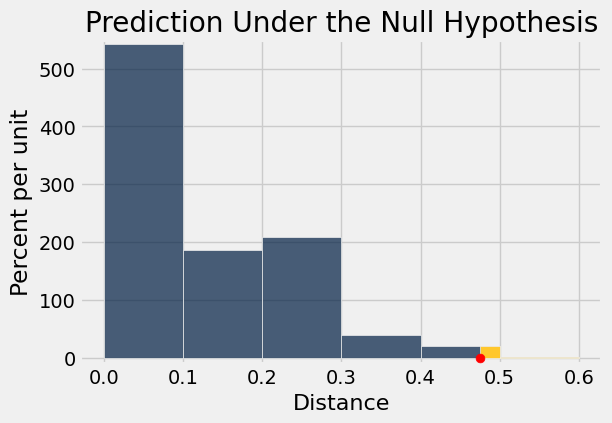

In [21]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

In [22]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.0083

El resultado es estadísticamente significativo. La prueba favorece la hipótesis alternativa sobre la nula. La evidencia apoya la hipótesis de que el tratamiento está haciendo algo.

El estudio informa de un valor P de 0,009, o 0,9 %, que no está lejos de nuestro valor empírico.

**Causalidad:** la prueba es evidencia de que el tratamiento causa la diferencia

# Otro ejemplo. 

# # 🏈 El manejo de las pelotas en el fútbol americano (NFL)

En el fútbol americano, especialmente en la **NFL**, el manejo de las pelotas es un aspecto importante y tiene reglas específicas. Aquí te explico cómo funciona:

---

## 📌 Cada equipo lleva sus propias pelotas  
- Antes de cada partido, **cada equipo proporciona 12 pelotas oficiales** para usar en sus posesiones ofensivas.  
- Estas pelotas están preparadas según las preferencias del equipo (*presión, textura, grip*, etc.), siempre cumpliendo con las normas de la **NFL**.  
- Además, se entregan **pelotas especiales** para equipos especiales (*kickoffs, despejes y goles de campo*), conocidas como **K-balls** (que son nuevas y sin modificar).

---

## 📌 ¿Por qué a veces se usa más la pelota de un equipo que la del otro?  
Esto depende de **quién está a la ofensiva**:  
- Cuando **el equipo A** tiene la posesión del balón, se usa **su pelota**.  
- Cuando **el equipo B** tiene la posesión, se usa **la pelota de ese equipo**.  

📊 Si durante el partido un equipo tiene la posesión por más tiempo (*por ejemplo, largas series ofensivas*), su pelota se usará más.

---

## 📌 Intercepciones, fumbles y cambios de posesión  
- Si ocurre un **fumble** o **intercepción**, el balón usado **sigue en juego** hasta que la jugada termine.  
- Luego, al iniciar la siguiente jugada, se cambia a la **pelota del equipo que ahora está a la ofensiva**.

---

## 📌 Reglas tras el escándalo del *Deflategate*  
Después del famoso escándalo del **Deflategate (2015)**, que es la revisaremos en lo que sigue, la **NFL** reforzó las reglas:

- ✅ Ahora, las pelotas son **revisadas antes del partido** por un **oficial de la NFL**.  
- ✅ Durante el partido, están bajo la **supervisión de los árbitros**.  


In [28]:
football = Table.read_table("team_scores.csv")
football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [30]:
football.column(2)

array([ 11.8 ,  11.2 ,  11.5 ,  11.  ,  11.45,  11.95,  12.3 ,  11.55,
        11.35,  10.9 ,  11.35,  12.35,  12.3 ,  12.95,  12.15])

In [31]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    )

In [33]:
football=football.drop(1, 2)

In [34]:
football

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [35]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [37]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [39]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


In [40]:
football = football.drop('Combined')
football.group('Team', np.average)

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227


Modelo: 11 caídas de los Patriots son una muestra aleatoria de  las 15 caídas

**Hn:** Las 11 caidas de los patriotos son de muestras aleatorias

**Ha:** Las pelotas que jugaron son mas grandes en comparcion con lal otro equipo

# Estadístico de prueba

In [41]:
observed_means = football.group('Team', np.average).column(1)

observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

In [47]:
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [48]:
difference_of_means(football, 'Team')

0.733522727272728

In [49]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

Team,Pressure Drop,Shuffled Label
Patriots,0.85,Patriots
Patriots,1.475,Colts
Patriots,1.175,Patriots
Patriots,1.65,Patriots
Patriots,1.225,Patriots
Patriots,0.725,Patriots
Patriots,0.425,Colts
Patriots,1.175,Colts
Patriots,1.35,Patriots
Patriots,1.8,Patriots


In [50]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.16249999999999942

In [51]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

# Prueba de la permutacion

In [52]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [53]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

Observed Difference: 0.733522727272728


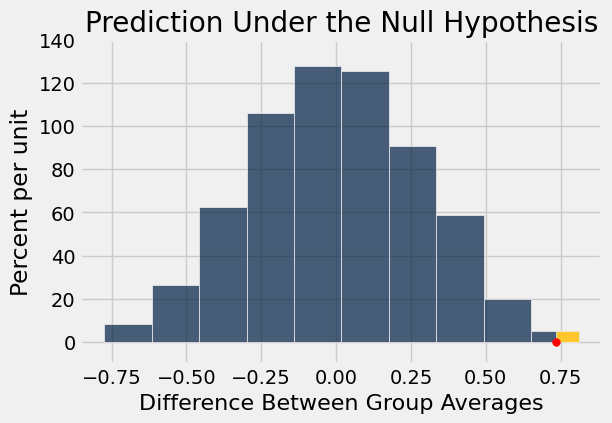

In [54]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plots.ylim(-0.1, 1.4)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

In [55]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.003